# Introduction

The purpose of this exploratory data analysis notebook is as follows:
* __Dataset Overview and Descriptive Statistics:__ examine the shape and format of the dataset, column data types, duplicate rows and/or missing values, outliers, and class balance
* __Feature Assessment and Visualization:__ interpret the “physics” of the features, box plots of their distributions, correlation analysis between features, dimensionality reduction with PCA, and plotting to get a rudimentary sense of the feature space and class separability
* __Data Quality Evaluation:__ assess possible complicating factors from the results of the previous two stages that might compromise an ML task built upon this dataset and how we propose to deal with them

To this end, a new Anaconda environment was created and used to install all the necessary packages the were utilized in this assignment.

In [44]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Dataset Overview and Descriptive Statistics

In this section, we examine the shape and format of the dataset, column data types, duplicate rows and/or missing values, the existence of outliers, and the balance of the classes.

We begin by checking the data types of the columns of our dataset, the existence of duplicate rows and missing values, as well as the descriptive statistics of our dataset.

In [2]:
df = pd.read_csv('../data/Diabetes.csv') # loading the dataset
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,0,113,80,16,0,31.0,0.874,21,0
1,552,6,114,88,0,0,27.8,0.247,66,0
2,50,1,103,80,11,82,19.4,0.491,22,0
3,631,0,102,78,40,90,34.5,0.238,24,0
4,47,2,71,70,27,0,28.0,0.586,22,0
...,...,...,...,...,...,...,...,...,...,...
501,113,4,76,62,0,0,34.0,0.391,25,0
502,556,1,97,70,40,0,38.1,0.218,30,0
503,427,1,181,64,30,180,34.1,0.328,38,1
504,322,0,124,70,20,0,27.4,0.254,36,1


In [3]:
print("Shape of the dataset:", df.shape) # displaying the shape of the dataset

Shape of the dataset: (506, 10)


In [4]:
print("\nColumn data types:\n", df.dtypes) # displaying the data types of the columns


Column data types:
 ID                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
print("\nNumber of duplicate rows:", df.duplicated().sum()) # checking for duplicate rows


Number of duplicate rows: 0


In [6]:
print("\nMissing values in each column:\n", df.isnull().sum()) # checking for missing values


Missing values in each column:
 ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
print("\nDescriptive statistics:\n")
df.describe() # displaying descriptive statistics of the data in the dataframe


Descriptive statistics:



,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,506.000000,506.000000,506.0000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,385.225296,3.879447,120.5000,69.397233,20.480237,76.666008,32.168775,0.478875,33.268775,0.349802
std,220.920434,3.354809,31.6791,18.970491,15.602888,107.365763,7.931377,0.340221,11.542041,0.477379
min,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,191.250000,1.000000,98.2500,62.000000,0.000000,0.000000,27.725000,0.245250,24.000000,0.000000
50%,382.500000,3.000000,116.0000,72.000000,23.000000,36.000000,32.400000,0.379000,29.000000,0.000000
75%,576.500000,6.000000,140.0000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,764.000000,17.000000,198.0000,122.000000,60.000000,744.000000,67.100000,2.329000,81.000000,1.000000


From the above, we deduce that:
* Column 'Outcome' is binary
* Columns 'ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age' are discrete
* Columns 'BMI', 'DiabetesPedigreeFunction' are continuous
* There are no null values in the dataset (but there are some 0s indicating missing values)
* There are no duplicate rows in the dataset

This means that we have a binary classification problem with 506 data points and 8 features (not including 'ID').

## <ins> Class Distributions </ins>

We proceed to check and plot the distribution of the target classes, since it is common for medical datasets to have imbalanced classes. Here, subjects with ‘Outcome’=1 correspond to Diabetes patients (positive class), and those with ‘Outcome’=0 correspond to healthy controls (negative class).

In [8]:
# Checking the distribution of the target variable 'Outcome'
class_distribution = df['Outcome'].value_counts()
print("\nClass distribution:\n", class_distribution)


Class distribution:
 Outcome
0    329
1    177
Name: count, dtype: int64


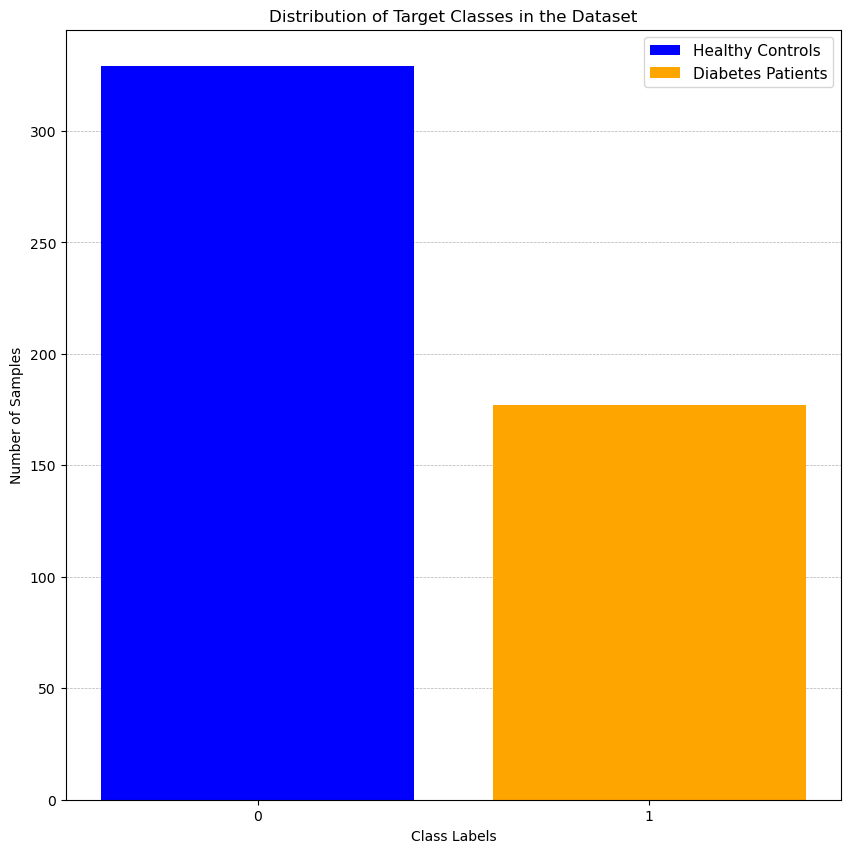

In [9]:
# Plotting the class distribution
labels = ['0', '1'] # setting up labels for the bars
counts = class_distribution.values # number of instances in each class
x = np.arange(len(labels)) # setting up positions for the bars
fig, ax = plt.subplots(figsize=(10, 10)) # setting up the figure and axis
# Adding labels to each bar for the legend
ax.bar(x[0], counts[0], color='blue', label='Healthy Controls')
ax.bar(x[1], counts[1], color='orange', label='Diabetes Patients')
ax.yaxis.grid(True, which='major', linestyle='--', linewidth='0.5') # only horizontal grid lines
ax.set_axisbelow(True) # ensuring grid lines are behind the bars
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Target Classes in the Dataset')
ax.set_xticks(x) # x-axis label positions
ax.set_xticklabels(labels) # x-axis labels
ax.legend(prop={'size': 11}, loc='upper right') # displaying the legend
plt.show()

From the plot above, we can see that the 'Diabetes patients' (positive) class is underrepresented in the dataset (almost half as many samples as the 'Healthy controls' negative class), which should be taken into account when choosing an evaluation metric (e.g. MCC, balanced accuracy etc.).

## <ins> Dealing with Outliers </ins>

We then look for outliers using the Interquantile Range (IQR) method, and assess whether or not to remove them, based on how they affect the class balance.

In [10]:
# Function to detect outliers using the IQR method and remove them
def detect_and_remove_outliers(df):
    for column in df.columns:
        if column != 'Outcome':  # excluding the target variable
            Q1 = df[column].quantile(0.25) # identifying the first quartile
            Q3 = df[column].quantile(0.75) # identifying the third quartile
            IQR = Q3 - Q1 # calculating the interquartile range
            lower_bound = Q1 - 1.5 * IQR # calculating the lower bound
            upper_bound = Q3 + 1.5 * IQR # calculating the upper bound
            df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))] # removing outliers
    return df

# Detecting and removing outliers
df_cleaned = detect_and_remove_outliers(df)

# New class distribution after removing outliers
print("\nClass distribution after removing outliers:\n", df_cleaned['Outcome'].value_counts())


Class distribution after removing outliers:
 Outcome
0    295
1    135
Name: count, dtype: int64


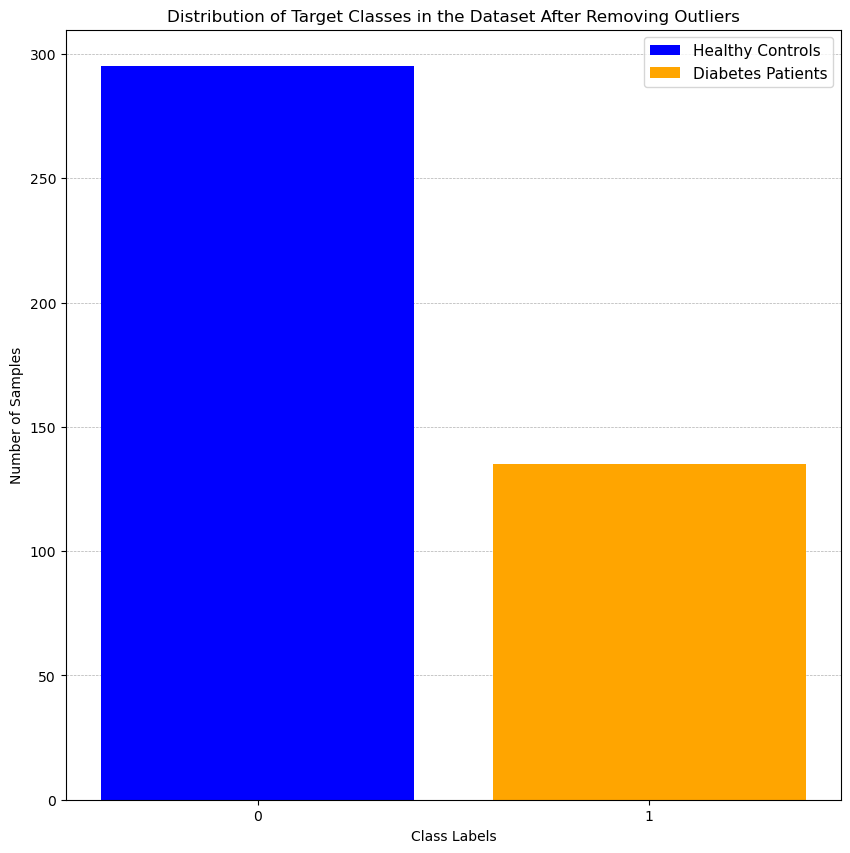

In [11]:
# Plotting the new class distribution after removing outliers
class_distribution_cleaned = df_cleaned['Outcome'].value_counts() # class distribution after removing outliers
counts_cleaned = class_distribution_cleaned.values # number of instances in each class
x_cleaned = np.arange(len(labels)) # setting up positions for the bars
fig, ax = plt.subplots(figsize=(10, 10)) # setting up the figure and axis
# Adding label parameter to each bar for the legend
ax.bar(x_cleaned[0], counts_cleaned[0], color='blue', label='Healthy Controls')
ax.bar(x_cleaned[1], counts_cleaned[1], color='orange', label='Diabetes Patients')
ax.yaxis.grid(True, which='major', linestyle='--', linewidth='0.5')  # only horizontal grid lines
ax.set_axisbelow(True)  # ensuring grid lines are behind the bars
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Target Classes in the Dataset After Removing Outliers')
ax.set_xticks(x_cleaned)  # x-axis label positions
ax.set_xticklabels(labels)  # x-axis labels
ax.legend(prop={'size': 11}, loc='upper right') # displaying the legend
plt.show()

From the above, it is evident that the removal of outliers with the IQR method results in lower positive class ratio of $31.4\%$ (135 out of 430 data points), compared to the original $35\%$ (177 out of 506 data points). This means that the outliers contain important information for the positive class and should not be removed in this case, especially considering that in medical data, deviations from the normal range often indicate pathological conditions.

## <ins> Dealing with Missing Values </ins>

Finally, we need to look for 0 values in the dataset, as they could represent missing or incorrect values rather than actual measurements. Here we identify the proportion of zero values in each feature. For that purpose, we first create a `df_features` dataframe by removing the 'Outcome' and 'ID' columns (since columns that serve as entry identifiers are not features and should be set as the dataframe indeces), so that it only contains the 8 features.

In [24]:
df_features = df.drop(columns=['Outcome', 'ID']) # dropping the target variable and the ID column
df_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,113,80,16,0,31.0,0.874,21
1,6,114,88,0,0,27.8,0.247,66
2,1,103,80,11,82,19.4,0.491,22
3,0,102,78,40,90,34.5,0.238,24
4,2,71,70,27,0,28.0,0.586,22
...,...,...,...,...,...,...,...,...
501,4,76,62,0,0,34.0,0.391,25
502,1,97,70,40,0,38.1,0.218,30
503,1,181,64,30,180,34.1,0.328,38
504,0,124,70,20,0,27.4,0.254,36


In [25]:
print("Proportion of zero values in each feature (%):\n", (df_features == 0).mean() * 100) # calculating the proportion of zero values in each feature

Proportion of zero values in each feature (%):
 Pregnancies                 13.833992
Glucose                      0.592885
BloodPressure                4.150198
SkinThickness               29.446640
Insulin                     48.221344
BMI                          1.581028
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


For the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' features, we shouldn't have any 0 values. Their existince indicates missing data. One way to handle this is to replace the zeros with the median value of the respective feature.

In [26]:
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # features where zero values indicate missing data

# Replacing zero values with the median of the respective feature
for feature in features_with_zeros:
    median_value = df[feature].median() # calculating the median of the feature
    df_features[feature] = df_features[feature].replace(0, median_value) # replacing zero values with the median

print("Proportion of zero values after replacement (%):\n", (df_features == 0).mean() * 100) # verifying that there are no zero values left in these features

Proportion of zero values after replacement (%):
 Pregnancies                 13.833992
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


# Feature Assessment and Visualization

In this section, we interpret the “physics” of the features by employing box plots of their distributions, correlation analysis between features, dimensionality reduction with PCA, and plotting to get a rudimentary sense of the feature space and class separability.

## <ins> Box Plots of Feature Distributions and Feature Scaling </ins>

We begin by creating box plots of the distributions of the features of our dataset, which can effectively summarize the distribution, central tendency, and variability of the data, while also highlighting potential outliers.

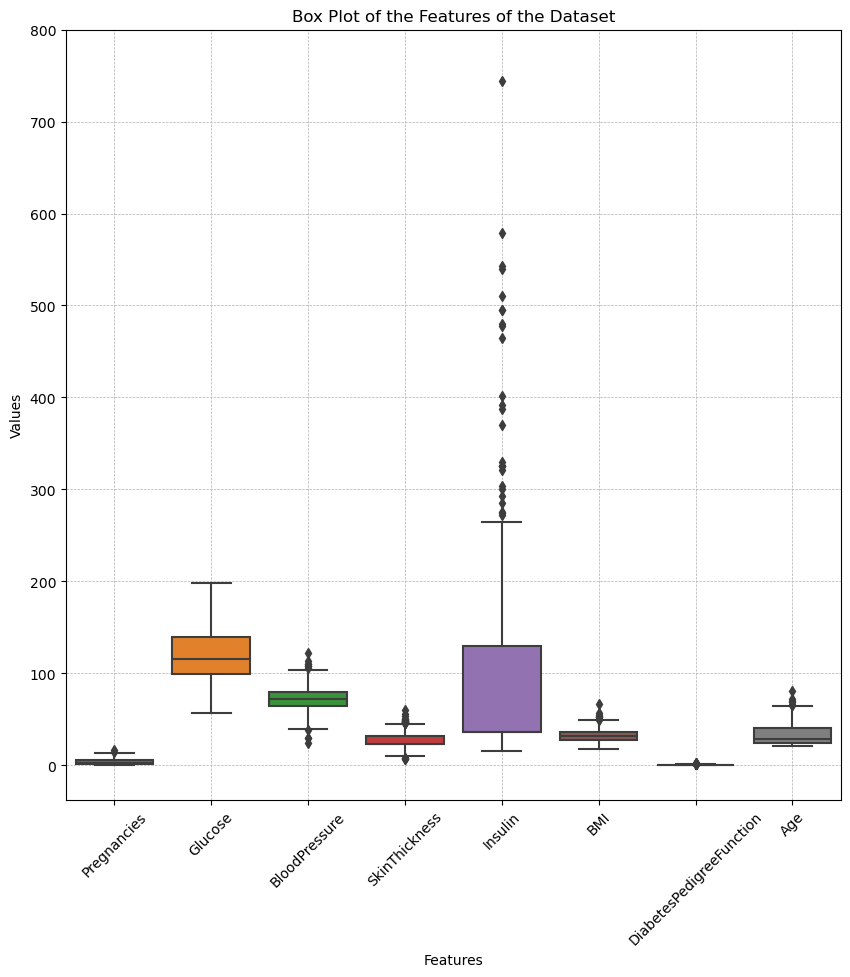

In [27]:
# Creating a box plot for the features
plt.figure(figsize=(10, 10)) # setting up the figure and axis
plt.title("Box Plot of the Features of the Dataset")
ax = sns.boxplot(data=df_features) # creating the box plot
plt.xlabel("Features")
plt.ylabel("Values")
plt.yticks(np.arange(0, 900, 100)) # setting up the y-axis ticks
plt.xticks(rotation=45) # rotating the x-axis labels
ax.set_axisbelow(True) # ensuring grid lines are behind the bars
plt.grid(linestyle='--', linewidth='0.5') # adding grid lines
plt.show()

It is evident that the range of values of the features is different. To deal with this before implementing our machine learning task, we will normalize the data using the MinMax Scaler.

$ X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}} $

MinMax Scaler transforms features by scaling each feature to a given range, typically between 0 and 1, and it also preserves the relationships between the original data points. It is useful in cases where no particular distribution of the data is assumed and the features have different scales.

In [28]:
# Normalizing the features using MinMaxScaler
scaler = MinMaxScaler() # creating an instance of the MinMaxScaler
features = scaler.fit_transform(df_features.values) # fitting and transforming the features
df_features_normalized = pd.DataFrame(features, columns=df_features.columns) # creating a dataframe with the normalized features
df_features_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.397163,0.571429,0.169811,0.027473,0.261759,0.351893,0.000000
1,0.352941,0.404255,0.653061,0.301887,0.027473,0.196319,0.072606,0.750000
2,0.058824,0.326241,0.571429,0.075472,0.090659,0.024540,0.181292,0.016667
3,0.000000,0.319149,0.551020,0.622642,0.101648,0.333333,0.068597,0.050000
4,0.117647,0.099291,0.469388,0.377358,0.027473,0.200409,0.223608,0.016667
...,...,...,...,...,...,...,...,...
501,0.235294,0.134752,0.387755,0.301887,0.027473,0.323108,0.136748,0.066667
502,0.058824,0.283688,0.469388,0.622642,0.027473,0.406953,0.059688,0.150000
503,0.058824,0.879433,0.408163,0.433962,0.225275,0.325153,0.108686,0.283333
504,0.000000,0.475177,0.469388,0.245283,0.027473,0.188139,0.075724,0.250000


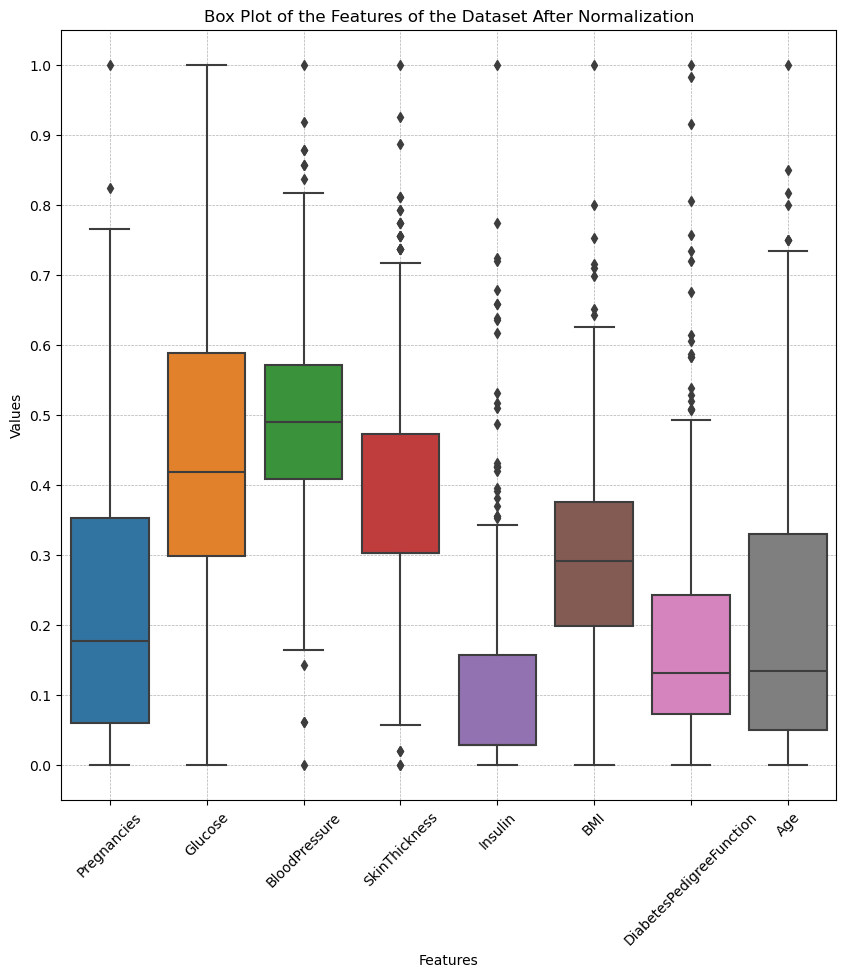

In [29]:
# Creating a box plot for the features
plt.figure(figsize=(10, 10)) # setting up the figure and axis
plt.title("Box Plot of the Features of the Dataset After Normalization")
ax = sns.boxplot(data=df_features_normalized) # creating the box plot
plt.xlabel("Features")
plt.ylabel("Values")
plt.yticks(np.arange(0, 1.1, 0.1)) # setting up the y-axis ticks
plt.xticks(rotation=45) # rotating the x-axis labels
ax.set_axisbelow(True) # ensuring grid lines are behind the bars
plt.grid(linestyle='--', linewidth='0.5') # adding grid lines
plt.show()

## <ins> Feature Correlation Analysis </ins>

Moving on, correlation analysis involves calculating the Pearson correlation coefficients between all pairs of features to understand how they are related. Correlation coefficients range from -1 to 1:

* A value close to 1 indicates a strong positive correlation, meaning as one feature increases, the other feature tends to also increase.
* A value close to -1 indicates a strong negative correlation, meaning as one feature increases, the other feature tends to decrease.
* A value close to 0 indicates little to no linear relationship between the features.

Here, we calculate the correlation matrix for the features and visualize it using a heatmap, where the color intensity represents the correlation coefficient values, to identify strongly correlated features. We use the normalized features as input, since correlation coefficients are standardized and measure the linear relationship between features, so the results are the same before and after normalization.

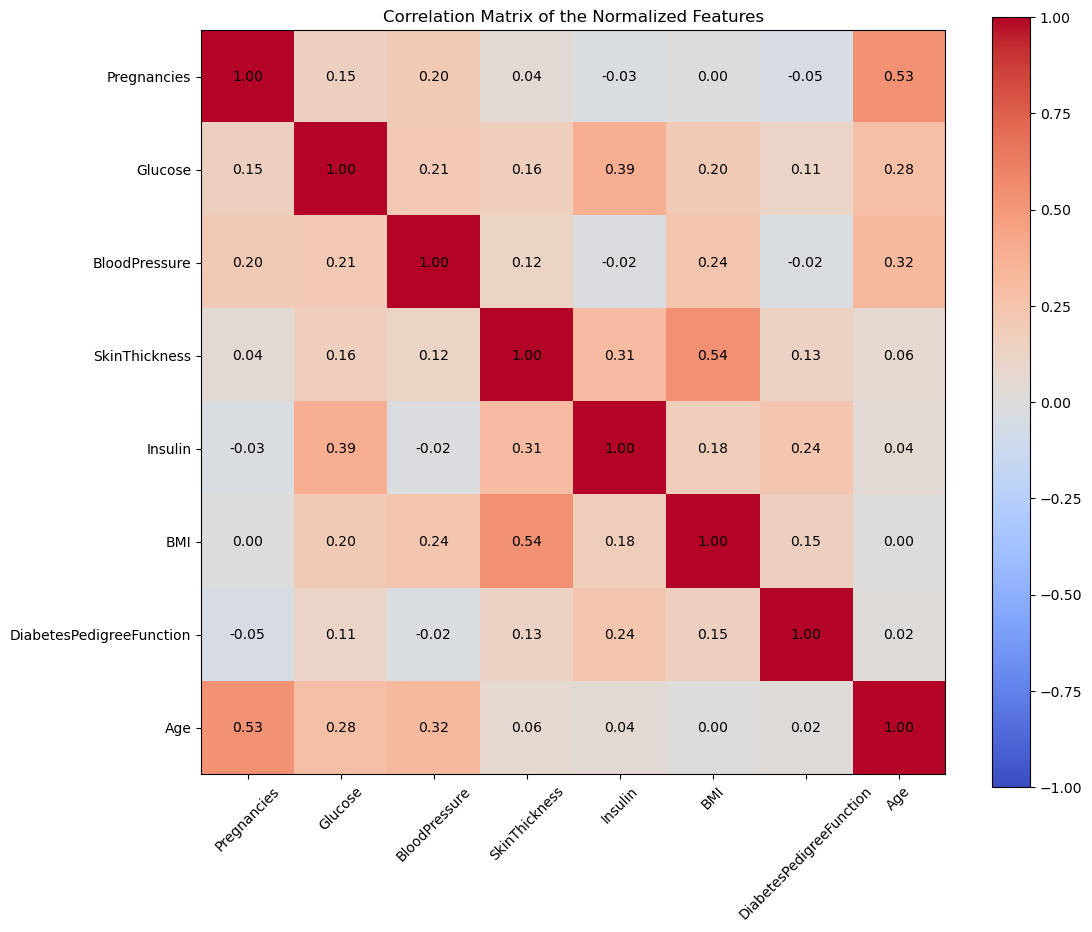

In [30]:
correlation_matrix = df_features_normalized.corr() # calculating the correlation matrix

# Plotting the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 10)) # setting up the figure and axis
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1) # creating the heatmap
fig.colorbar(cax) # adding the colorbar
# Setting axis labels
ax.set_xticks(range(len(df_features_normalized.columns)))
ax.set_yticks(range(len(df_features_normalized.columns)))
ax.set_xticklabels(df_features_normalized.columns, rotation=45)
ax.set_yticklabels(df_features_normalized.columns)
ax.xaxis.set_ticks_position('bottom') # moving x-axis labels to the bottom
# Annotating the heatmap with correlation values
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title("Correlation Matrix of the Normalized Features")
plt.show()

# Here, seaborn could not be used, because there is an error with its heatmap function that it yet to be fixed (https://github.com/microsoft/vscode-jupyter/issues/14363).

Even though we do not observe any particularly strong correlations between features, we note some notable positive correlations (>0.3) between:
* 'SkinThickness' and 'BMI' (0.54)
* 'Pregnancies' and 'Age' (0.53)
* 'Glucose' and 'Insulin' (0.39)
* 'BloodPressure' and 'Age' (0.32)
* 'SkinThickness' and 'Insulin' (0.31)

## <ins> Principal Component Analysis (PCA) </ins>

PCA is a technique used to reduce the dimensionality of a dataset while retaining most of the variance in the data. It transforms the original features into a new set of features called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they explain.

Here, we perform PCA by fitting PCA on the normalized features, transforming the features to the new principal components, calculating the explained variance by each principal component, as well as visualizing the data in the new principal component feature space.

In [40]:
pca = PCA(n_components=3) # initializing PCA with 3 components
principal_components = pca.fit_transform(df_features_normalized) # fitting PCA on the normalized features and transforming the features
# Creating a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Outcome'] = df['Outcome']
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Outcome
0,-0.287542,0.086262,-0.148888,0
1,0.312147,-0.398556,-0.008043,0
2,-0.344243,-0.114811,-0.273950,0
3,-0.221308,0.184587,0.183712,0
4,-0.392117,-0.083336,0.135109,0
...,...,...,...,...
501,-0.305335,-0.154084,0.131097,0
502,-0.176322,0.102139,0.246445,0
503,0.217706,0.301577,-0.255941,1
504,-0.140802,-0.027888,-0.206546,1


In [41]:
# Printing the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component:\nPC1: {explained_variance[0]:.4f}\nPC2: {explained_variance[1]:.4f}\nPC3: {explained_variance[2]:.4f}")
print(f"Total explained variance: {explained_variance.sum():.4f}")

Explained variance by each principal component:
PC1: 0.3178
PC2: 0.2135
PC3: 0.1398
Total explained variance: 0.6711


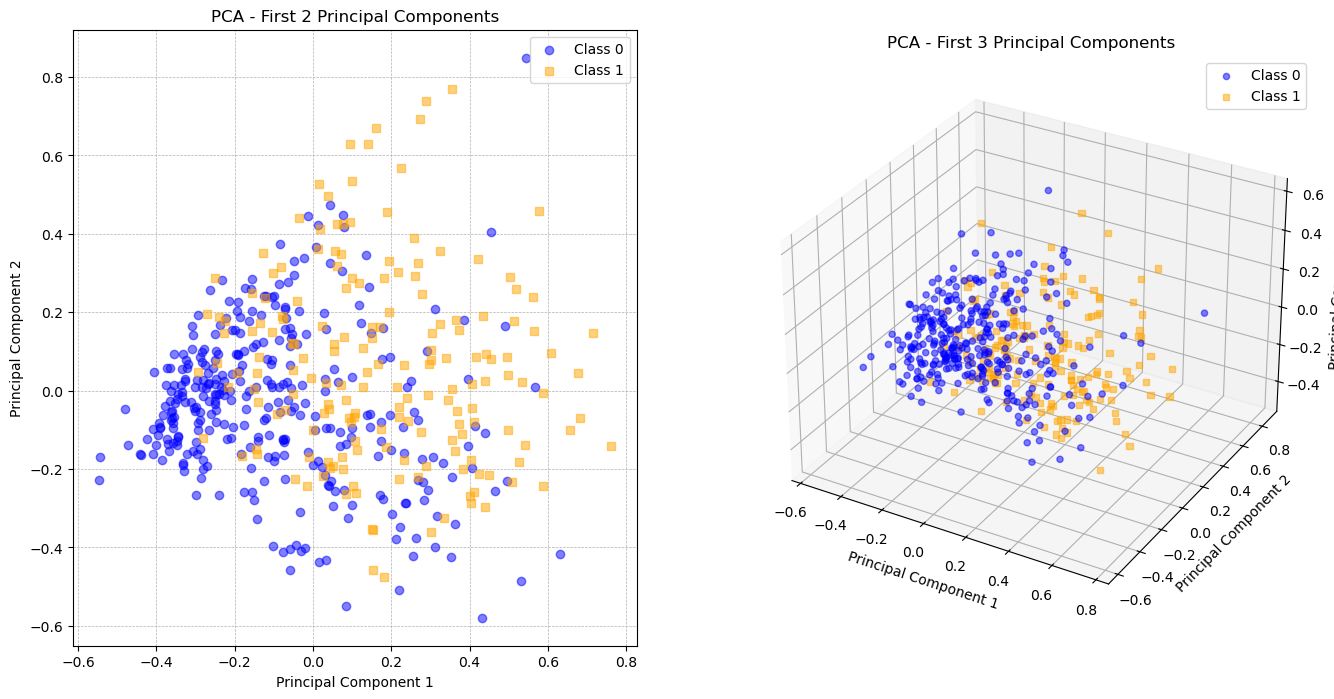

In [42]:
# Plotting the principal components in 2D and 3D
fig = plt.figure(figsize=(16, 8)) # setting up the figure and axis

# 2D plot
ax1 = fig.add_subplot(121) # creating the 2D plot
colors = ['blue', 'orange']
markers = ['o', 's']
# Plotting the principal components in 2D
for i, outcome in enumerate(pca_df['Outcome'].unique()):
    ax1.scatter(pca_df[pca_df['Outcome'] == outcome]['Principal Component 1'],
                pca_df[pca_df['Outcome'] == outcome]['Principal Component 2'],
                color=colors[i], marker=markers[i], label=f'Class {outcome}', alpha=0.5)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA - First 2 Principal Components')
ax1.legend(loc='best')
ax1.set_axisbelow(True) # ensuring grid lines are behind the bars
ax1.grid(True, linestyle='--', linewidth=0.5) # adding grid lines

# 3D plot
ax2 = fig.add_subplot(122, projection='3d') # creating the 3D plot
# Plotting the principal components in 3D
for i, outcome in enumerate(pca_df['Outcome'].unique()):
    ax2.scatter(pca_df[pca_df['Outcome'] == outcome]['Principal Component 1'],
                pca_df[pca_df['Outcome'] == outcome]['Principal Component 2'],
                pca_df[pca_df['Outcome'] == outcome]['Principal Component 3'],
                color=colors[i], marker=markers[i], label=f'Class {outcome}', alpha=0.5)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.set_title('PCA - First 3 Principal Components')
ax2.legend(loc='best')
ax2.set_axisbelow(True) # ensuring grid lines are behind the bars
ax2.grid(True, linestyle='--', linewidth=0.5) # adding grid lines

plt.show()


## <ins> Getting a Sense of Class Separability </ins>

Here, we visualize the normalized features to understand their distribution and separability with respect to the class labels. This will involve creating pair plots and individual feature distributions.

A pair plot allows us to visualize pairwise relationships between features and how they relate to the target class. This helps us see if there are any visible separations between the classes.

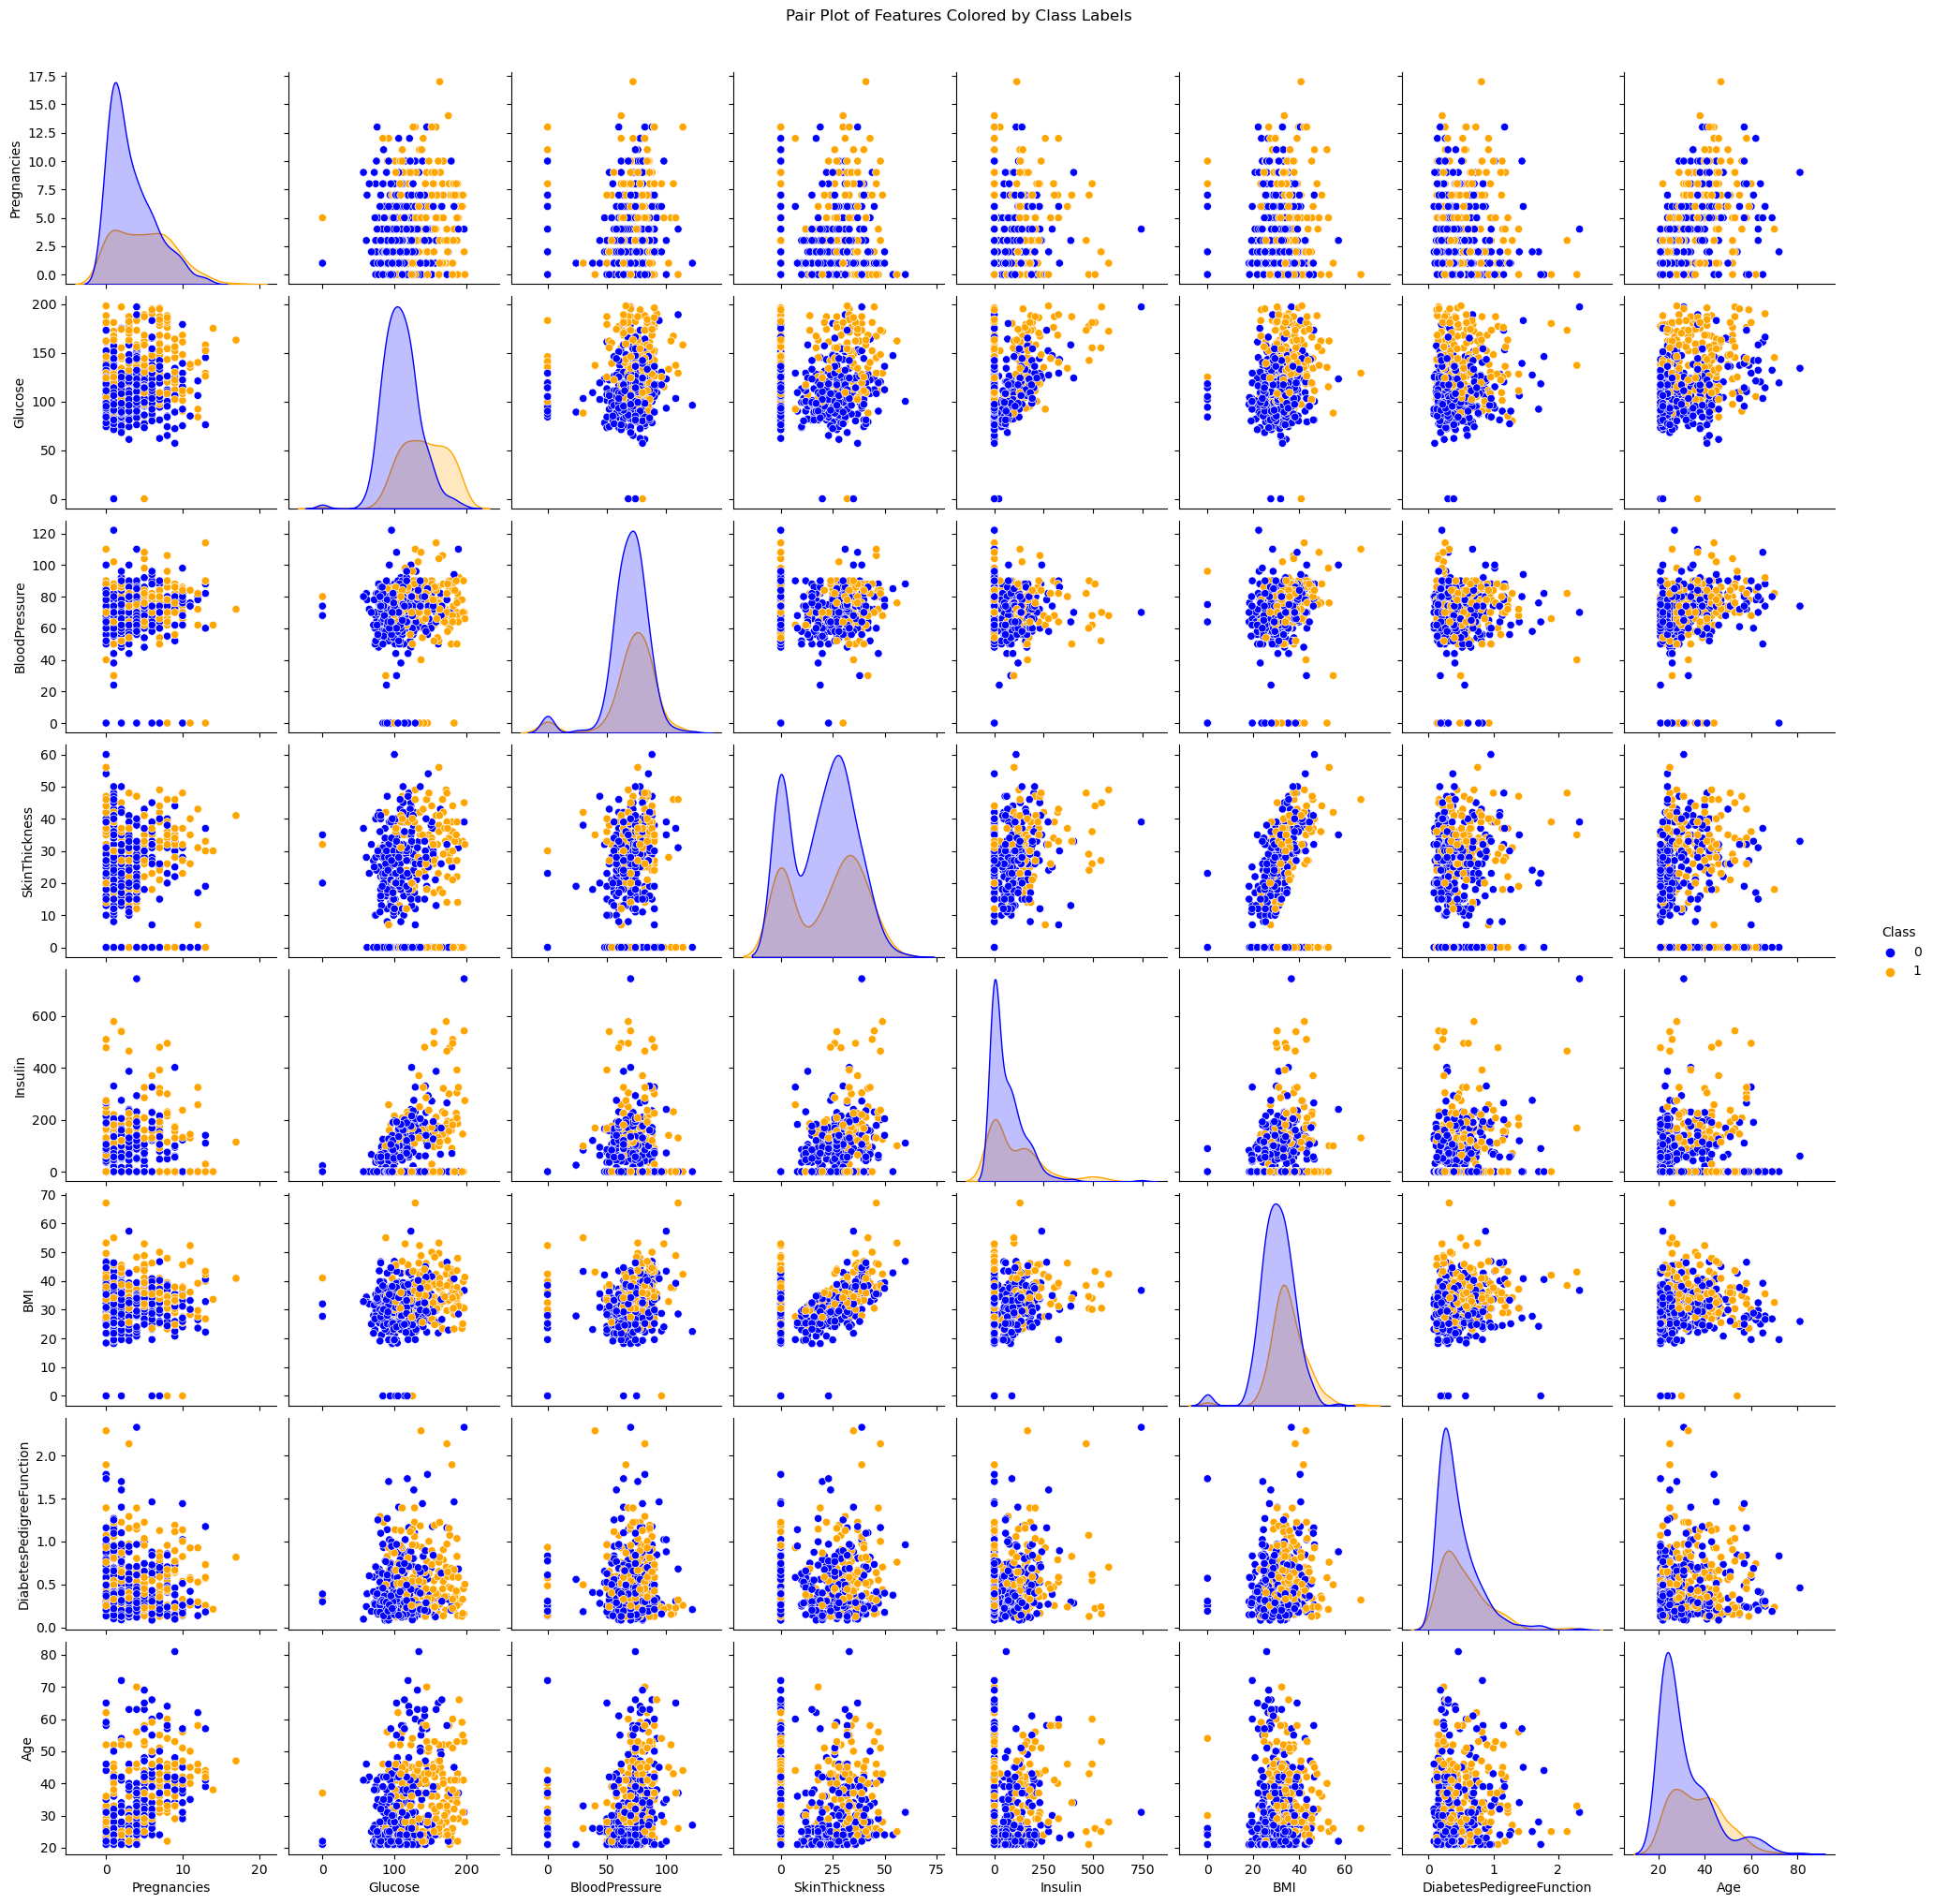

In [50]:
# Creating a pair plot for the features with respect to the class labels
pairplot = sns.pairplot(df, hue='Outcome', vars=df_features.columns, palette={0: 'blue', 1: 'orange'}) # creating the pair plot
pairplot._legend.set_title('Class') # setting the legend title
plt.suptitle("Pair Plot of Features Colored by Class Labels", y=1.02) # adding the title
plt.show()

We can also create individual distribution plots (histograms) for each feature, colored by the class labels to see how the distributions differ between the classes.

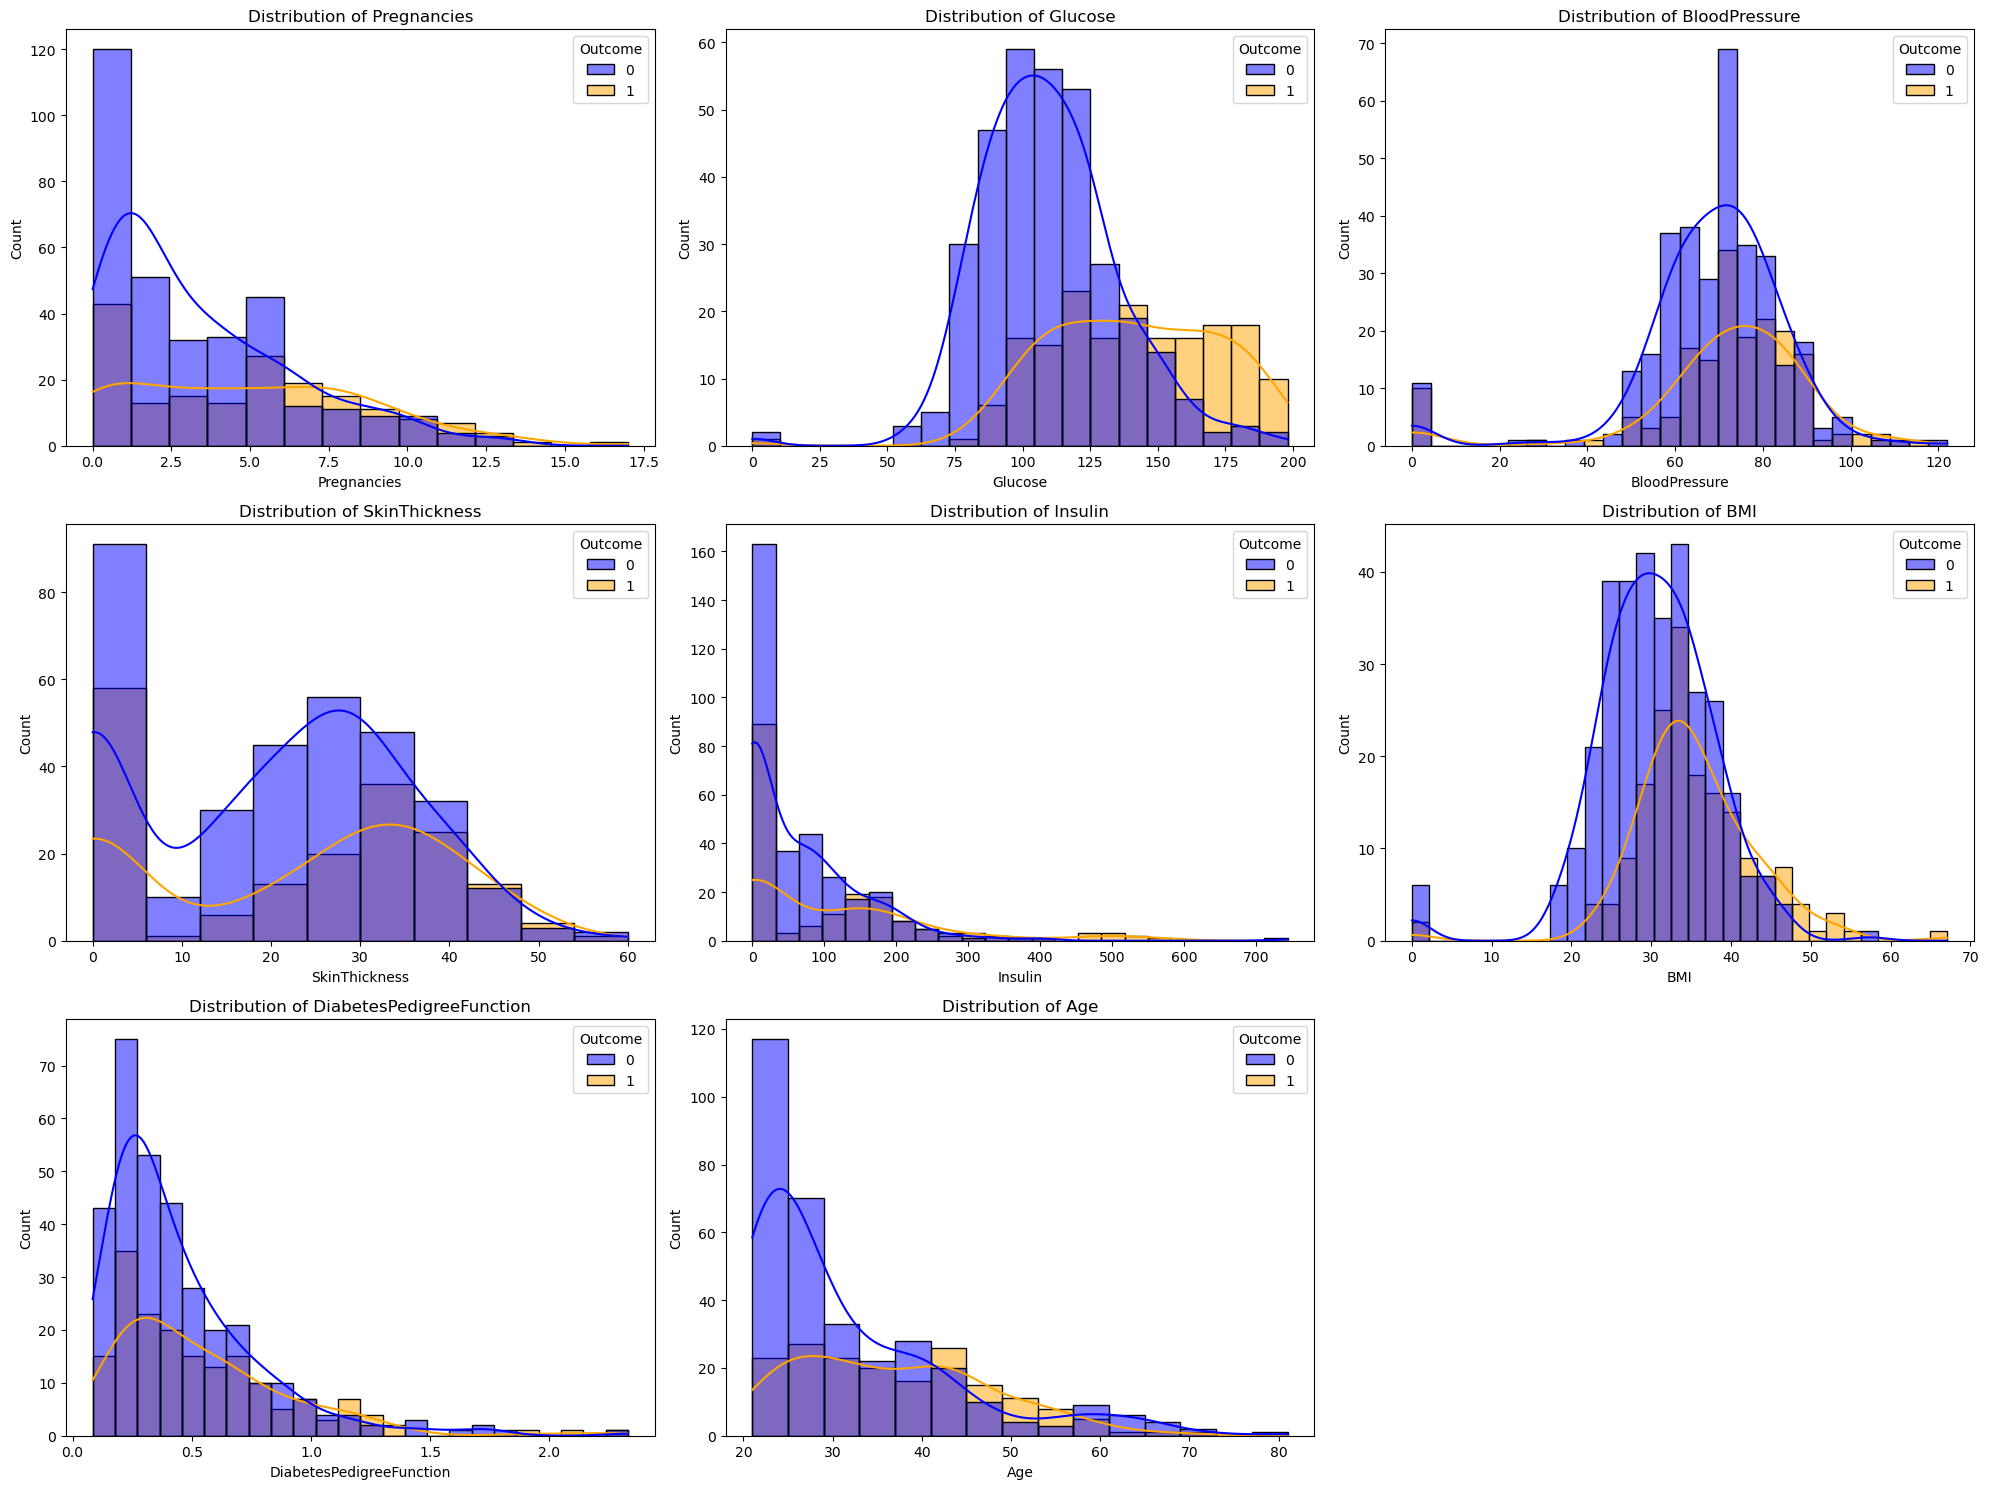

In [52]:
# Create distribution plots for each feature
plt.figure(figsize=(20, 15))
# Plotting distribution plots for each feature
for i, feature in enumerate(df_features_normalized.columns):
    plt.subplot(3, 3, i+1) # creating the subplots
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, palette={0: 'blue', 1: 'orange'}, alpha=0.5) # creating the distribution plot
    plt.title(f'Distribution of {feature}') # adding the title to each subplot
plt.tight_layout()
plt.show()

The pair plot and individual distribution plots reveal some insights into class separability in the dataset. Features like Glucose and BMI show the most promise, with higher values more associated with Diabetes patients, demonstrating good separation. In contrast, Pregnancies, BloodPressure, and SkinThickness exhibit moderate separation with considerable overlap, while Insulin, DiabetesPedigreeFunction, and Age show significant overlap, indicating weaker separability. Correlations between features, such as Glucose and Insulin, suggest potential multicollinearity. Overall, Glucose and BMI stand out as the most discriminative features for classifying Diabetes patients, based on this analysis.

# Data Quality Evaluation

In this section, we assess possible complicating factors from the results of the previous two stages that might compromise an ML task built upon this dataset and how we propose to deal with them.

As mentioned before, the 'Diabetes patients' (positive) class is underrepresented in the dataset. This fact will be taken into account when choosing an evaluation metric that takes class imbalances into account (e.g. MCC, balanced accuracy etc.) and by implementing cost-effective learning using class weights.

Another issue that needs to be addressed is the implementation of feature selection during our machine learning task. We will run our entire machine learning pipeline twice: once without feature selection and once with feature selection using `SelectKBest` with the mutual information scoring function, and compare the results. Feature selection with `SelectKBest` is a method in scikit-learn that selects the top k features (5 in this case) based on a specified scoring function. In this context, the scoring function used is `mutual_info_classif`, which measures the mutual information (MI) between each feature and the target variable. Mutual information quantifies the dependency between two variables, providing a non-negative value that is zero if and only if the variables are independent. Higher MI values indicate a higher dependency. This method is particularly beneficial for capturing any kind of dependency between variables, not just linear relationships, thus helping in identifying the features that provide the most information about the target variable.